# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
%pip install --upgrade plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
print(f'The data set has {df_data.shape[0]} rows and {df_data.shape[1]} columns')
print(f"The data's columns name are {df_data.columns[0:]}")
print(f'The first year Nobel prize was awarded {df_data.year.min()}')
print(f'The latest year included in the dataset is {df_data.year.max()}')

The data set has 962 rows and 16 columns
The data's columns name are Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')
The first year Nobel prize was awarded 1901
The latest year included in the dataset is 2020


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [6]:
print(f'There are {df_data.duplicated().sum()} values in the dataset')
print(f'There are {df_data.isna().values.sum()} values in the dataset')



There are 0 values in the dataset
There are 1023 values in the dataset


### Check for NaN Values

In [7]:
df_data.isna().sum()

print('These columns have NaN because they are text related to motivation, birth origin and missing birthday')

These columns have NaN because they are text related to motivation, birth origin and missing birthday


In [8]:
# Investing NaN values

col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']

df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [9]:
# Investing NaN values

col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']

df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
1,1901,Literature,Individual,1839-03-16,Sully Prudhomme,NaN
3,1901,Peace,Individual,1822-05-20,Frédéric Passy,NaN
4,1901,Peace,Individual,1828-05-08,Jean Henry Dunant,NaN
7,1902,Literature,Individual,1817-11-30,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,1843-05-21,Charles Albert Gobat,NaN
...,...,...,...,...,...,...
932,2018,Peace,Individual,1993-07-02,Nadia Murad,NaN
942,2019,Literature,Individual,1942-12-06,Peter Handke,NaN
946,2019,Peace,Individual,1976-08-15,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,1943-04-22,Louise Glück,NaN


### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [10]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

#### Add a Column with the Prize Share as a Percentage

In [11]:
seperated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(seperated_values[0])
denomerator = pd.to_numeric(seperated_values[1])
prize_share_pct = (numerator/denomerator) * 100
df_data.insert(5, 'prize_share_pct', prize_share_pct, True)
# df_data.drop('prize_share_pct', inplace=True, axis=1)
df_data.head()


,year,category,prize,motivation,prize_share,prize_share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,100.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,100.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,100.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,50.00,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,50.00,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   prize_share_pct        962 non-null    float64       
 6   laureate_type          962 non-null    object        
 7   full_name              962 non-null    object        
 8   birth_date             934 non-null    datetime64[ns]
 9   birth_city             931 non-null    object        
 10  birth_country          934 non-null    object        
 11  birth_country_current  934 non-null    object        
 12  sex                    934 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [13]:
biology = df_data.sex.value_counts()
biology



Male      876
Female     58
Name: sex, dtype: int64

In [83]:
fig = px.pie(labels=biology.index, values=biology.values, names=biology.index, hole=0.4)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:140: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [14]:
df_data.query("sex == 'Female' ").sort_values('year', ascending=True)

print(f'The first three females Nobel laureates were Marie Currie, Baroness Bertha Sophie and Selma Ottila')
print('These three won nobel prizes in Physics, Peace and Literature')
print('They are from Warsaw, Prague, and Marbacka')
print('They were not apart of any organisation')

The first three females Nobel laureates were Marie Currie, Baroness Bertha Sophie and Selma Ottila
These three won nobel prizes in Physics, Peace and Literature
They are from Warsaw, Prague, and Marbacka
They were not apart of any organisation


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [15]:
no_repeated_winners = df_data.full_name.duplicated().sum()
print(f'There are {no_repeated_winners} won Nobel Prize more than once')


There are 7 won Nobel Prize more than once


In [16]:
df_data.loc[df_data.full_name.duplicated()]['full_name']

print(f'The seven people are Marie Curie, Comite international de la Croix Rogue, \
Linus Carl Pauling, John Bardeen, Frederic Sanger and Office of the United Nations High Commissioner')

The seven people are Marie Curie, Comite international de la Croix Rogue, Linus Carl Pauling, John Bardeen, Frederic Sanger and Office of the United Nations High Commissioner


# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [17]:
df_data.category.unique()

print(f'There are 6 categories including Chemistry, Literature, Medicine, Peace, Physics, Economics')

There are 6 categories including Chemistry, Literature, Medicine, Peace, Physics, Economics


In [141]:
df_category_wins = df_data.category.value_counts()
df_category_wins

# fig = px.bar(df_category_wins, x=df_category_wins.index, y=df_category_wins.values, color=df_category_wins.values, color_continuous_scale='Aggrnyl')

# fig.update_layout(xaxis_title='Nobel Category', yaxis_title='No. Prizes Won')

# fig.show()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [18]:
df_data[df_data.category=='Economics'].sort_values('year', ascending=True)[0:3]

# print('The first economics won in 1969, the prize went to Jan Tinbergen')

,year,category,prize,motivation,prize_share,prize_share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,50.00,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,50.00,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,100.00,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [19]:
male_female_winners = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})

male_female_winners.sort_values('prize', inplace=True, ascending=False)

In [20]:
# Plotting the data

bar_chart = px.bar(male_female_winners, x='category', y = 'prize', color='sex')

bar_chart.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [21]:
no_prizes_by_year = df_data.groupby('year').agg({'prize': pd.Series.count})
moving_average = no_prizes_by_year.prize.rolling(window=5).mean()

moving_average

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

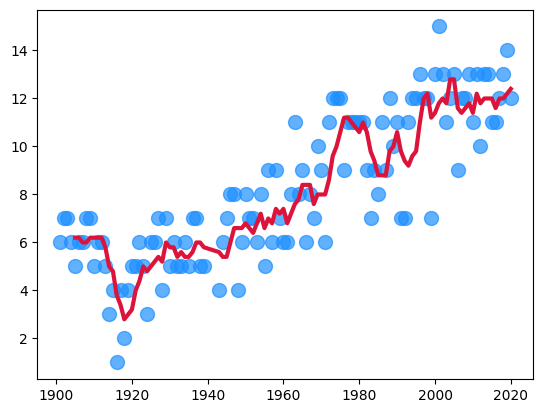

In [22]:
# Plotting the number of prizes awarded over time

plt.scatter(x = no_prizes_by_year.index, y=no_prizes_by_year.values, c='dodgerblue', alpha=0.7, s=100)

plt.plot(no_prizes_by_year.index, moving_average.values, c='crimson', linewidth=3)




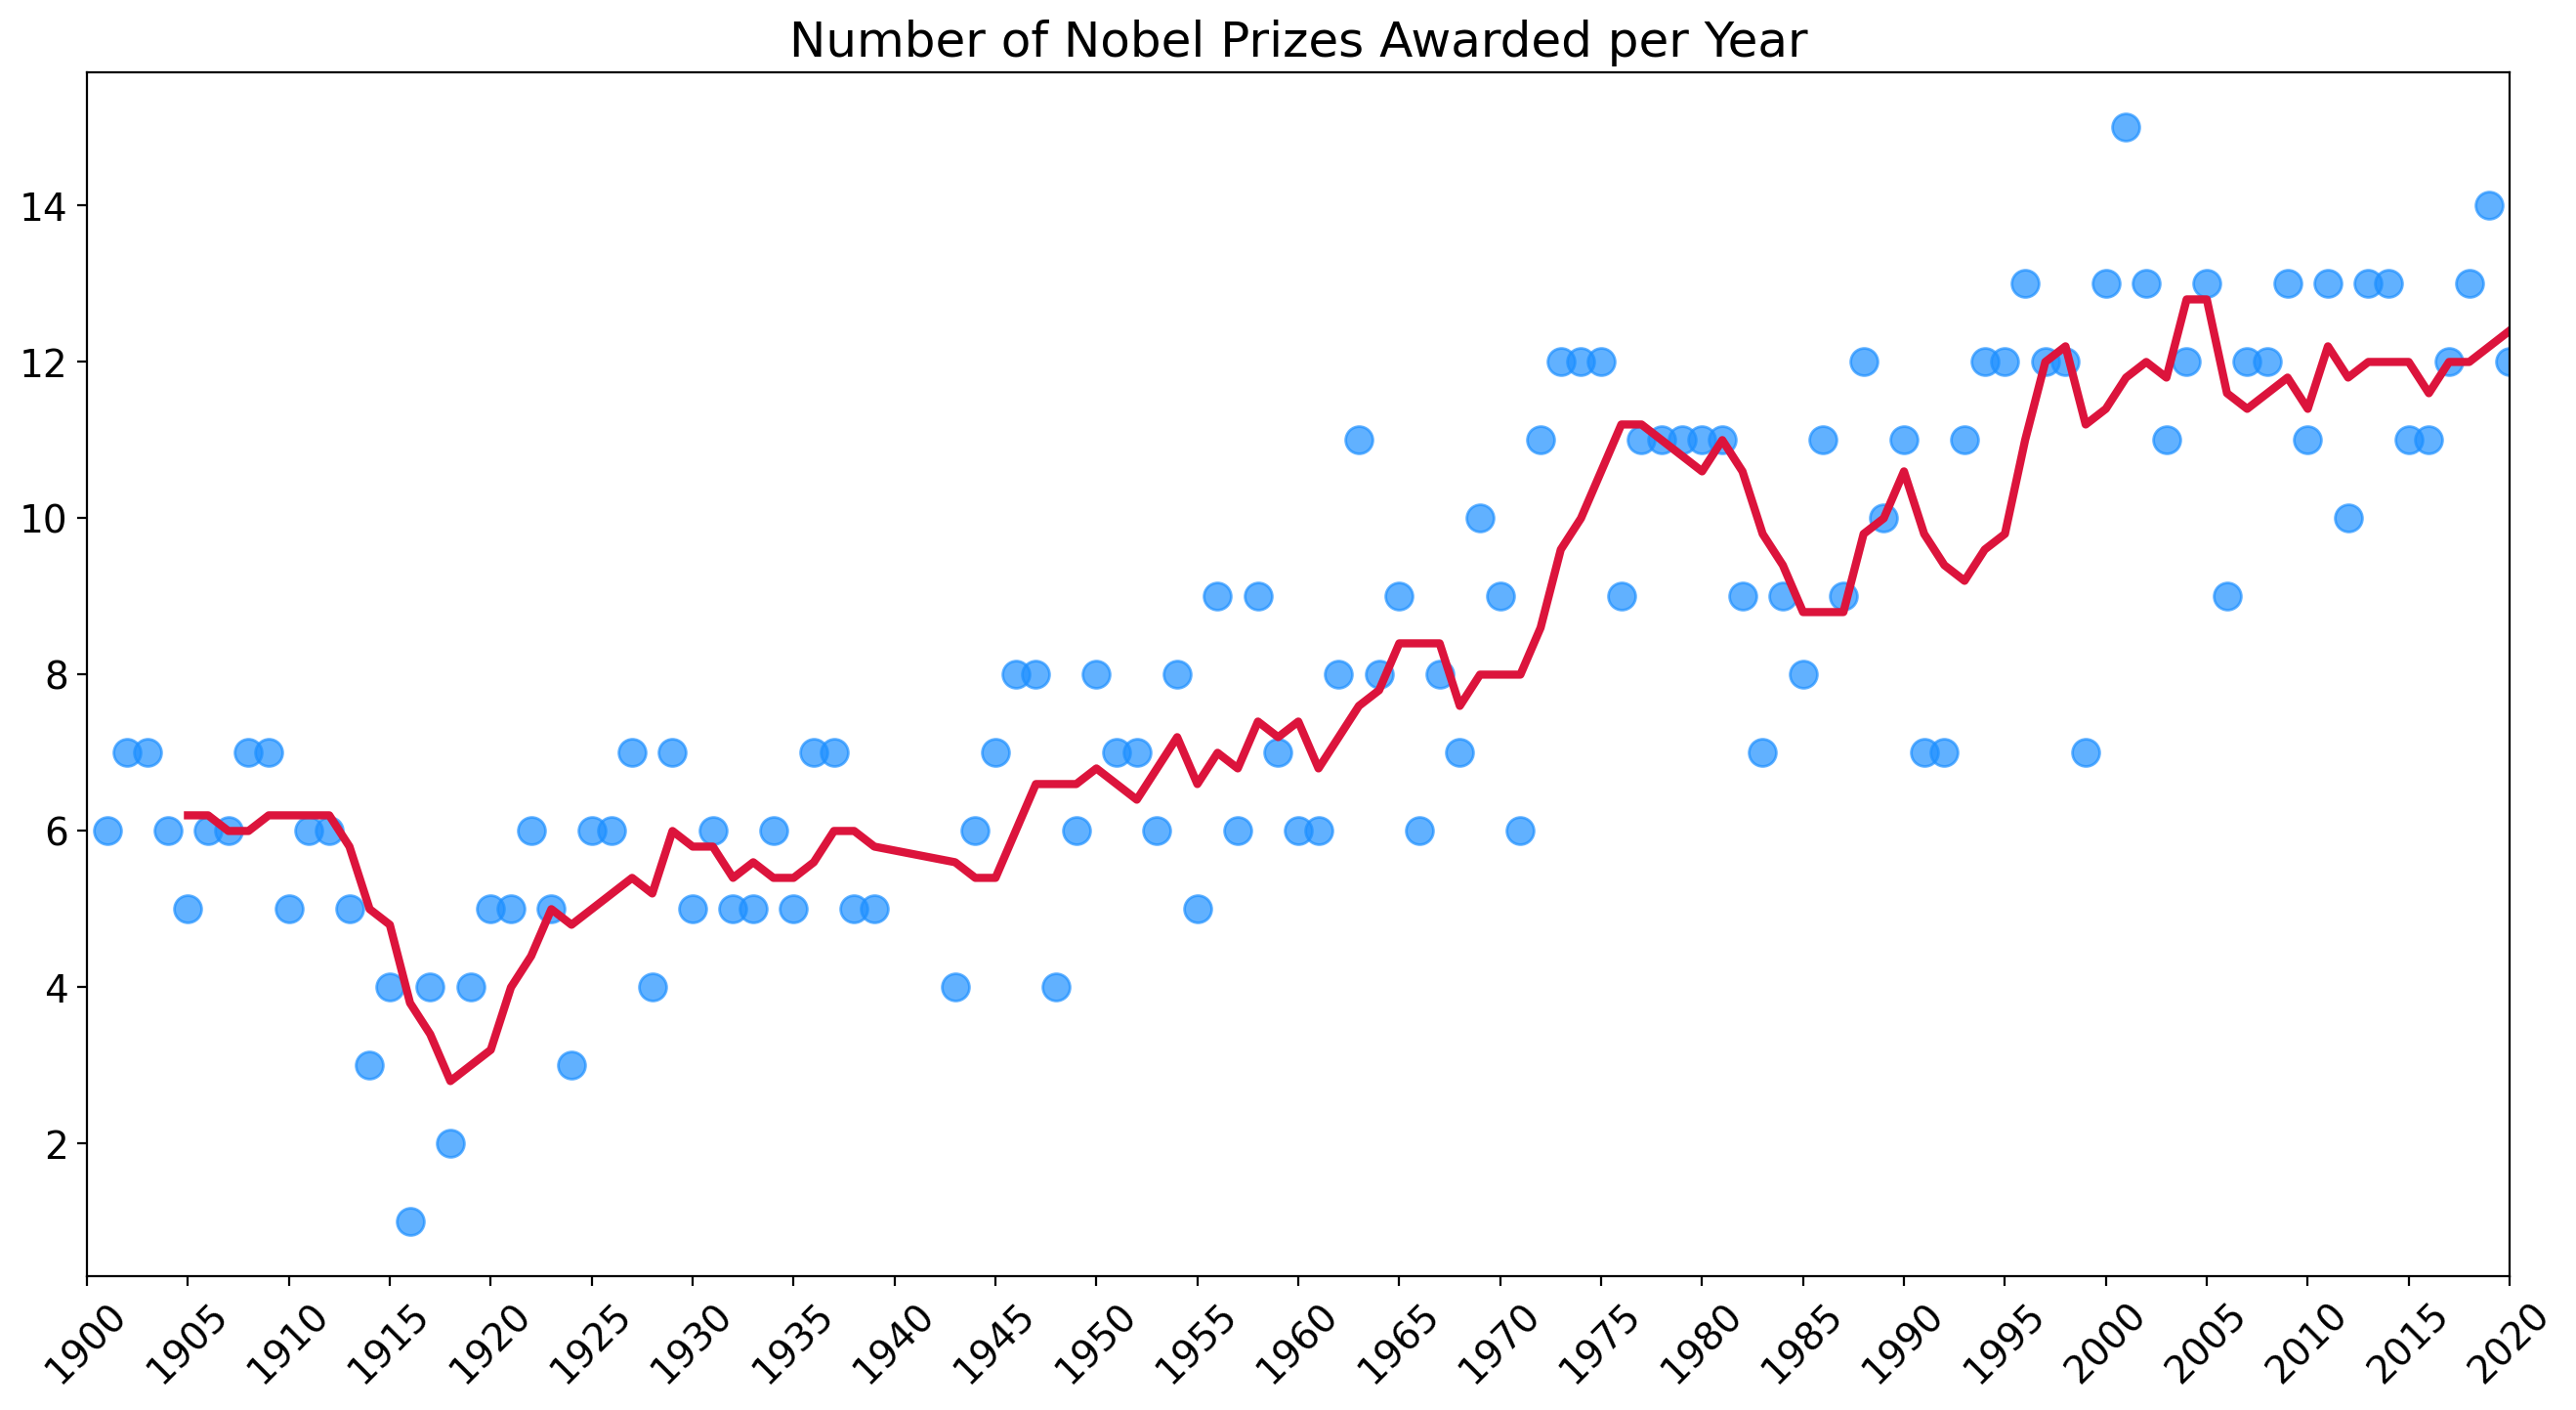

In [23]:
plt.figure(figsize=(16,8), dpi=200)

plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)

plt.yticks(fontsize=14)

plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax = plt.gca() # Get current axis
ax.set_xlim(1900, 2020)

ax.scatter(x=no_prizes_by_year.index, y=no_prizes_by_year.values, c='dodgerblue', alpha=0.7, s=100)

ax.plot(no_prizes_by_year.index, moving_average.values, c='crimson', linewidth=3)

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [24]:
df_data.head()

avg_prize_share = df_data.groupby('year', as_index=False).agg({'prize_share_pct': pd.Series.mean})



avg_prize_moving_average = avg_prize_share.prize_share_pct.rolling(window=5).mean()

avg_prize_share.head()


,year,prize_share_pct
0,1901,83.33
1,1902,71.43
2,1903,71.43
3,1904,83.33
4,1905,100.00


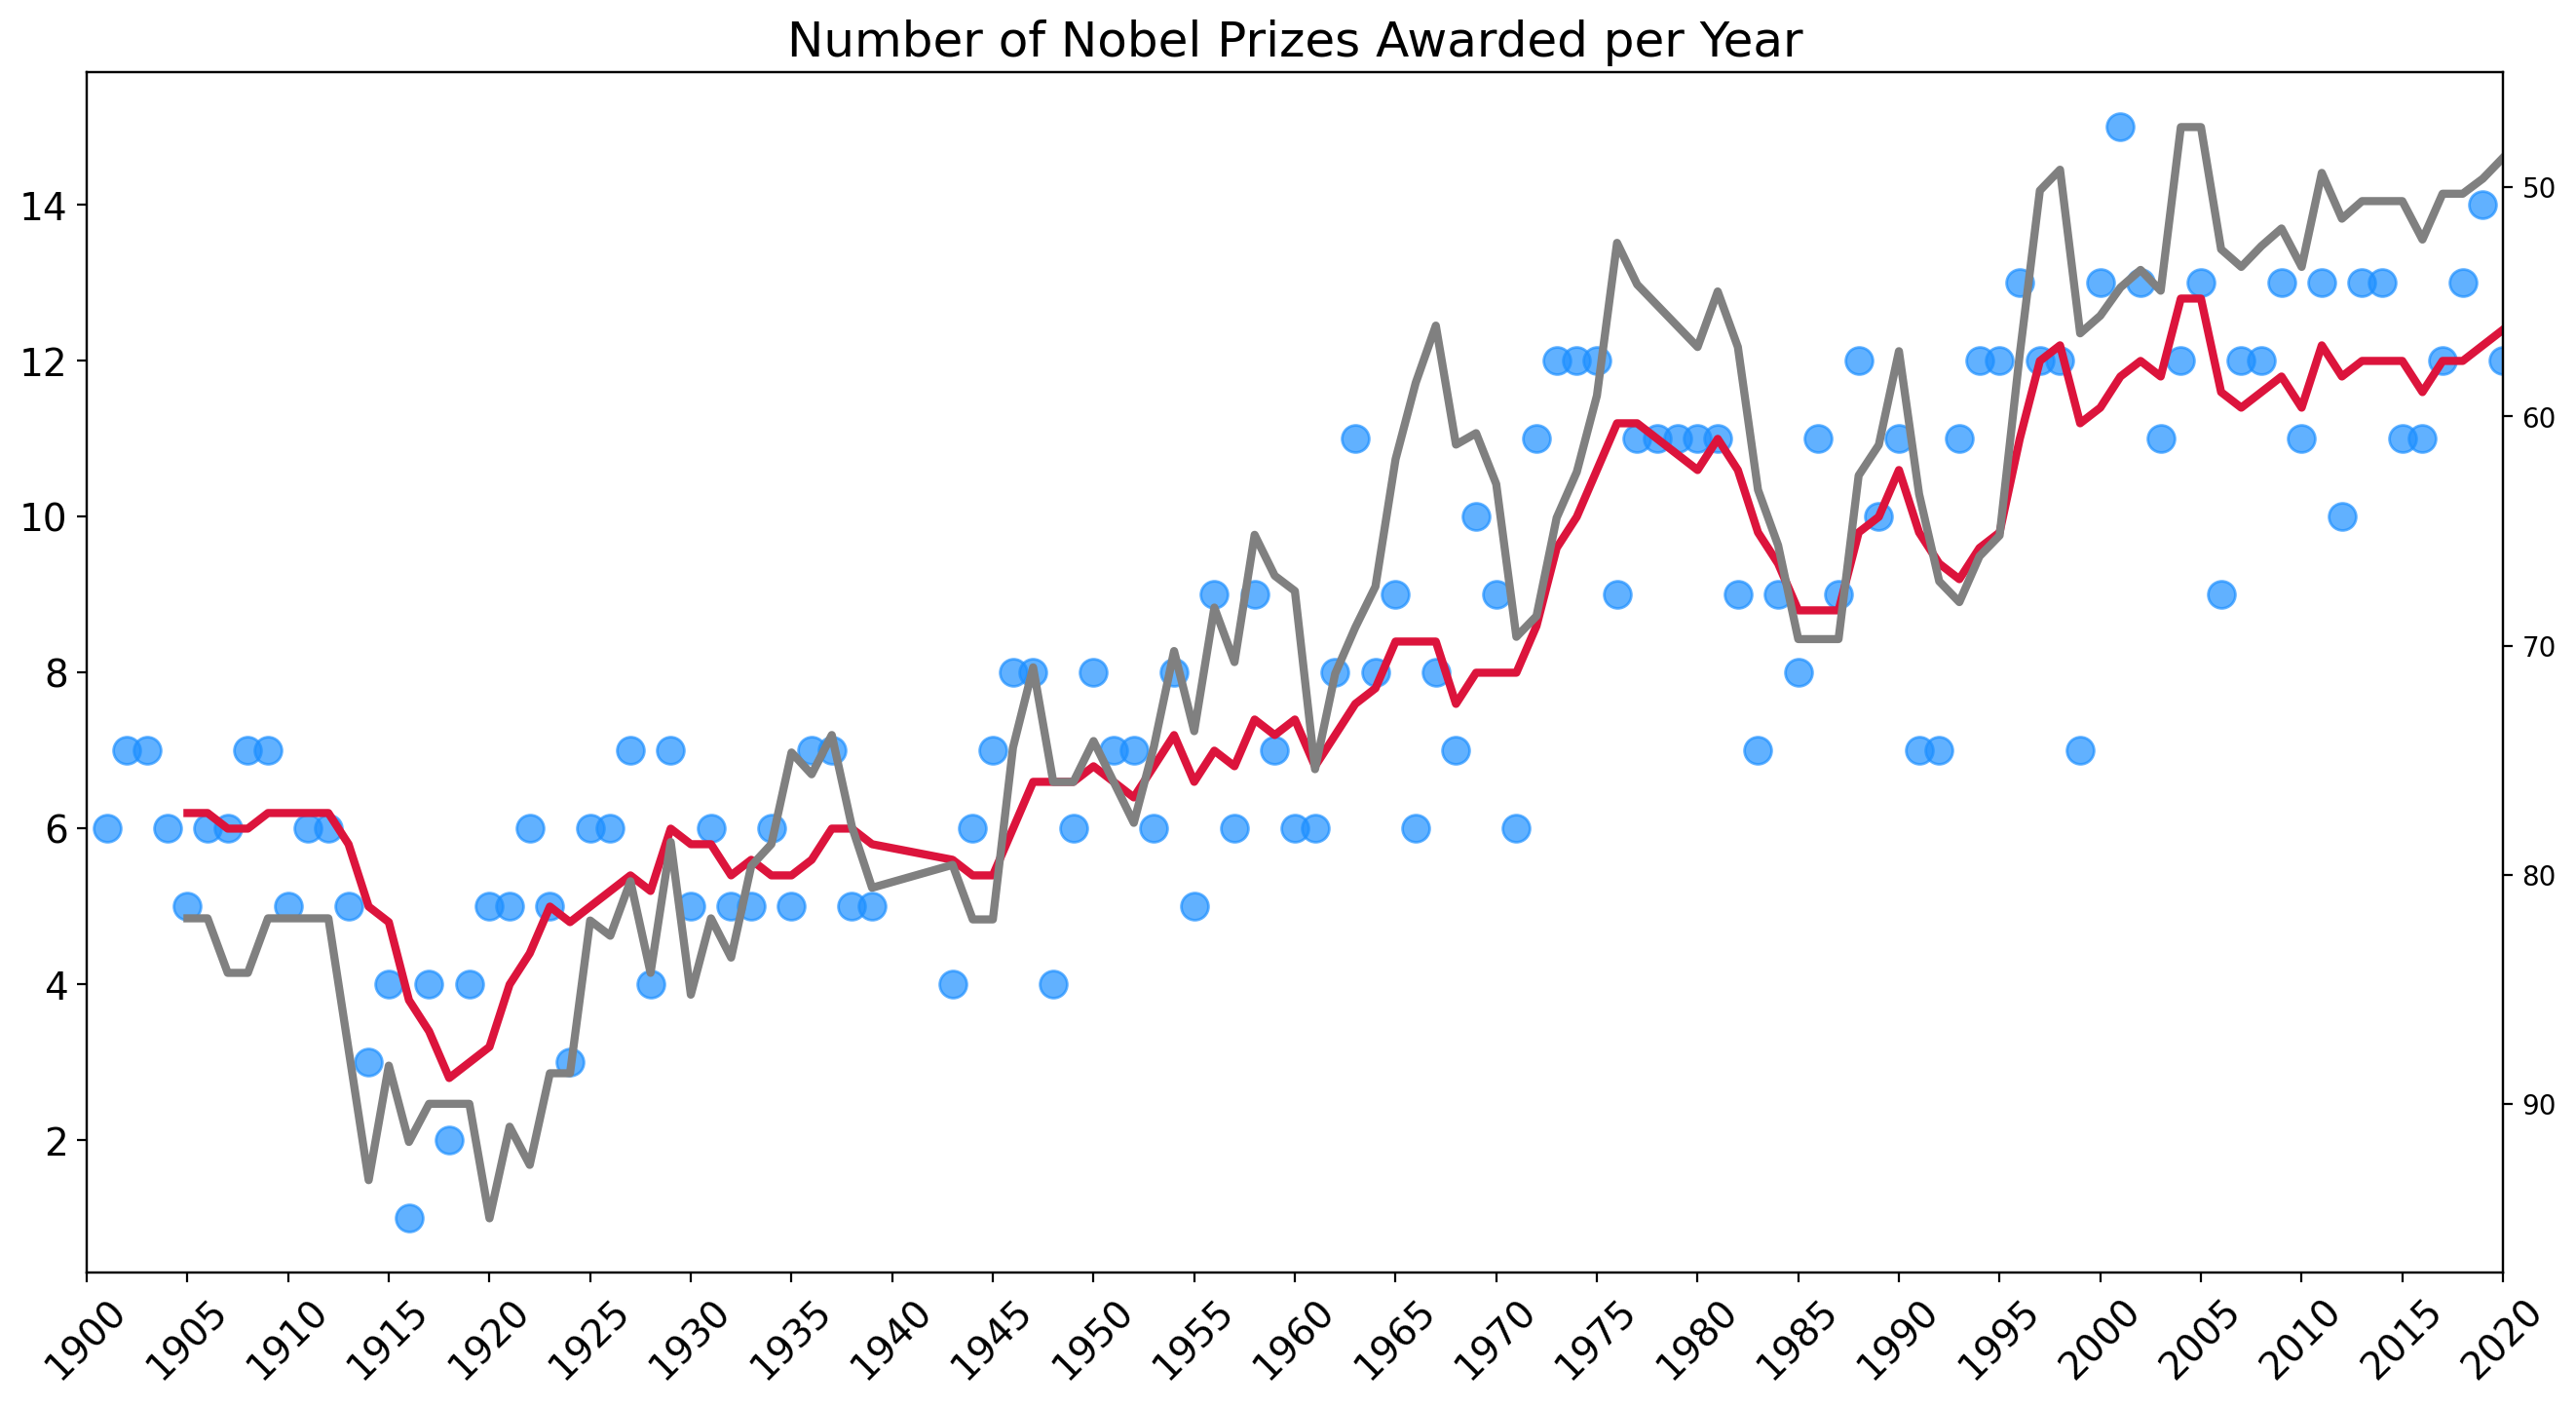

In [25]:
plt.figure(figsize=(16,8), dpi=200)

plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)

plt.yticks(fontsize=14)

plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax1 = plt.gca() # Get current axis
ax2 = ax1.twinx() # Creating second axis

ax2.invert_yaxis()


ax1.set_xlim(1900, 2020)

ax1.scatter(x=no_prizes_by_year.index, y=no_prizes_by_year.values, c='dodgerblue', alpha=0.7, s=100)

ax1.plot(no_prizes_by_year.index, moving_average.values, c='crimson', linewidth=3)




# ax.scatter(x=avg_prize_share.year, y=avg_prize_share.prize_share_pct, c='dodgerblue', alpha=0.7, s=100)

ax2.plot(avg_prize_share.year, avg_prize_moving_average.values, c='grey', linewidth=3)

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [130]:
top_20 = df_data.birth_country_current.value_counts()

top_20_df = pd.DataFrame({'birth_country_current': top_20.index, 'prize': top_20.values})

top_20_df.sort_values('prize', ascending=True, inplace=True)

top_20_df

,birth_country_current,prize
78,Ethiopia,1
48,Trinidad,1
49,Myanmar,1
50,Iraq,1
51,Yemen,1
...,...,...
4,Sweden,29
3,France,57
2,Germany,84
1,United Kingdom,105


In [ ]:
print(f'The problem with birth_country column is that, some of these countries might no longer exist')

In [131]:
# Creating horizontal bar chart

fig = px.bar(top_20_df[-20:], x='prize', y='birth_country_current', orientation='h', color='prize')

fig.update_layout(xaxis_title='No Of Prizes', yaxis_title='Country Won')

fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [92]:
# Making a new dataframe for the chronopleth map

df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})

df_countries.sort_values('prize', ascending=False)




,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [101]:
fig = px.choropleth(df_countries, locations='ISO',
                    color='prize', hover_name='birth_country_current',
                    color_continuous_scale = px.colors.sequential.matter
                    )

fig.show()

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [173]:
countries_cat = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})


df_countries_cat = pd.DataFrame(countries_cat)

df_countries_cat.sort_values('prize', ascending=True, inplace=True)

df_countries_cat


,birth_country_current,category,prize
0,Algeria,Literature,1
122,Lithuania,Medicine,1
121,Lithuania,Literature,1
120,Lithuania,Chemistry,1
118,Latvia,Chemistry,1
...,...,...,...
198,United Kingdom,Medicine,28
202,United States of America,Economics,49
201,United States of America,Chemistry,55
206,United States of America,Physics,70


In [175]:
merge_df = pd.merge(df_countries_cat, top_20_df, on='birth_country_current')

merge_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']

merge_df.sort_values('total_prize', inplace=True)

In [187]:
# Creating chart

cat_country_bar_chart = px.bar(merge_df, x='cat_prize', y='birth_country_current', color='category', orientation='h')


cat_country_bar_chart.update_layout(xaxis_title='No. Of Prizes', yaxis_title='Countries')
cat_country_bar_chart.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [242]:
prize_by_year = df_data.groupby(['year', 'birth_country_current'], as_index=False).count()

prize_by_year


,year,birth_country_current,category,prize,motivation,prize_share,prize_share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,ISO
0,1901,France,2,2,1,2,2,2,2,2,2,2,2,0,0,0,2
1,1901,Germany,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1901,Netherlands,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1901,Poland,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1901,Switzerland,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2019,United States of America,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
623,2020,France,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
624,2020,Germany,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
625,2020,United Kingdom,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2


In [249]:
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

prize_by_year

,year,birth_country_current,prize
0,1901,France,2
1,1901,Germany,1
2,1901,Netherlands,1
3,1901,Poland,1
4,1901,Switzerland,1
...,...,...,...
618,2019,India,1
624,2020,Germany,1
625,2020,United Kingdom,2
623,2020,France,1


In [255]:
# Creating a cummulative sum

cummalative_prize = prize_by_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()

cummalative_prize.reset_index(inplace=True)

In [256]:
fig = px.line(cummalative_prize, x ='year', y='prize', color='birth_country_current')

fig.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [265]:
df_org = df_data[df_data.organization_name != 'NA']

df_org.dropna(inplace=True)

df_org.head()

,year,category,prize,motivation,prize_share,prize_share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,100.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,100.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,100.00,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,100.00,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Germany,Male,Berlin University,Berlin,Germany,DEU
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,100.00,Individual,Ronald Ross,1857-05-13,Almora,India,India,Male,University College London,Liverpool,United Kingdom,IND


In [274]:
df_org_prizes = df_org.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})

df_org_prizes = df_org_prizes.sort_values('prize', ascending=True)

df_org_prizes

,organization_name,prize
0,A.F. Ioffe Physico-Technical Institute,1
143,Polarographic Institute of the Czechoslovak Ac...,1
144,Polytechnic Institute,1
147,Queen's University,1
148,Rheinische Friedrich-Wilhelms-Universität,1
...,...,...
196,University of Chicago,20
116,Massachusetts Institute of Technology (MIT),21
166,Stanford University,23
68,Harvard University,28


In [285]:
# Plotting bar chart

fig = px.bar(df_org_prizes, x='prize', y='organization_name',
             color='prize', orientation='h',
             color_continuous_scale=px.colors.sequential.haline,
             title='Top 20 Research Institution by Number of Prizes'
             )

fig.update_layout(xaxis_title='No. of Prizes', yaxis_title='Institution Name')

fig.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [298]:
df_city = df_data[df_data.organization_city != 'NA']

df_city.dropna(inplace=True)


df_city_prizes = df_city.groupby('organization_city', as_index=False).agg({'prize': pd.Series.count})

df_city_prizes = df_city_prizes.sort_values('prize', ascending=False)[:20]

top_20_city = df_city_prizes[:20].sort_values('prize', ascending=True)

In [299]:
fig = px.bar(top_20_city, x='prize', y='organization_city',
             color='prize', orientation='h',
             color_continuous_scale=px.colors.sequential.haline,
             title='Top 20 City by Number of Prizes'
             )

fig.update_layout(xaxis_title='No. of Prizes', yaxis_title='City Name')

fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [302]:
df_birth_city = df_data[df_data.birth_city != 'NA']

df_birth_city.dropna(inplace=True)


df_birth_city_prizes = df_birth_city.groupby('birth_city', as_index=False).agg({'prize': pd.Series.count})

df_birth_city_prizes = df_birth_city_prizes.sort_values('prize', ascending=False)[:20]

top_20_birth_city = df_birth_city_prizes[:20].sort_values('prize', ascending=True)

top_20_birth_city

,birth_city,prize
51,Breslau (Wroclaw),3
66,"Cambridge, MA",3
313,"Philadelphia, PA",3
259,Montreal,3
315,"Pittsburgh, PA",4
380,Stockholm,4
261,Moscow,5
159,Hamburg,5
125,Frankfurt-on-the-Main,5
58,Budapest,7


In [305]:
fig = px.bar(top_20_birth_city, x='prize', y='birth_city',
             color='prize', orientation='h',
             color_continuous_scale=px.colors.sequential.Plasma,
             title='Top 20 City by Number of Prizes'
             )

fig.update_layout(xaxis_title='No. of Prizes', yaxis_title='City Name')

fig.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [314]:
# Creating the dataframe for sunburts graph

country_sunburst = df_data.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})

In [317]:
# Creating dataframe

df_country_sunburst = pd.DataFrame(country_sunburst)

df_country_sunburst.sort_values('prize', ascending=False)

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [321]:
# Plotting the sun burst diagram

fig = px.sunburst(df_country_sunburst, path=['organization_country', 'organization_city', 'organization_name']

                  )

fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [326]:
winning_age = df_data.year - df_data.birth_date.dt.year

# df_data.insert(9, 'Winning_Age', winning_age)

df_data.head()

,year,category,prize,motivation,prize_share,prize_share_pct,laureate_type,full_name,birth_date,Winning_Age,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,100.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,49.00,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,100.00,Individual,Sully Prudhomme,1839-03-16,62.00,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,100.00,Individual,Emil Adolf von Behring,1854-03-15,47.00,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,50.00,Individual,Frédéric Passy,1822-05-20,79.00,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,50.00,Individual,Jean Henry Dunant,1828-05-08,73.00,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [337]:
df_data.sort_values('Winning_Age', ascending=True)

# print(f'The youngest Nobel laureate is Malala Yousafzai v''hoff at the age of 17. He won a prize in Peace')

# print(f'The oldest Nobel laureate is John Goodenough at the age of 97. He won a prize in Chemistry')

,year,category,prize,motivation,prize_share,prize_share_pct,laureate_type,full_name,birth_date,Winning_Age,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,50.00,Individual,Malala Yousafzai,1997-07-12,17.00,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,50.00,Individual,William Lawrence Bragg,1890-03-31,25.00,Adelaide,Australia,Australia,Male,Victoria University,Manchester,United Kingdom,AUS
932,2018,Peace,The Nobel Peace Prize 2018,“for their efforts to end the use of sexual vi...,1/2,50.00,Individual,Nadia Murad,1993-07-02,25.00,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ
305,1957,Physics,The Nobel Prize in Physics 1957,"""for their penetrating investigation of the so...",1/2,50.00,Individual,Tsung-Dao (T.D.) Lee,1926-11-24,31.00,Shanghai,China,China,Male,Columbia University,"New York, NY",United States of America,CHN
171,1933,Physics,The Nobel Prize in Physics 1933,"""for the discovery of new productive forms of ...",1/2,50.00,Individual,Paul Adrien Maurice Dirac,1902-08-08,31.00,Bristol,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,100.00,Organization,European Union (EU),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,100.00,Organization,Organisation for the Prohibition of Chemical W...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897,2015,Peace,The Nobel Peace Prize 2015,"""for its decisive contribution to the building...",1/1,100.00,Organization,National Dialogue Quartet,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,2017,Peace,The Nobel Peace Prize 2017,“for its work to draw attention to the catastr...,1/1,100.00,Organization,International Campaign to Abolish Nuclear Weap...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Winning_Age', ylabel='Count'>

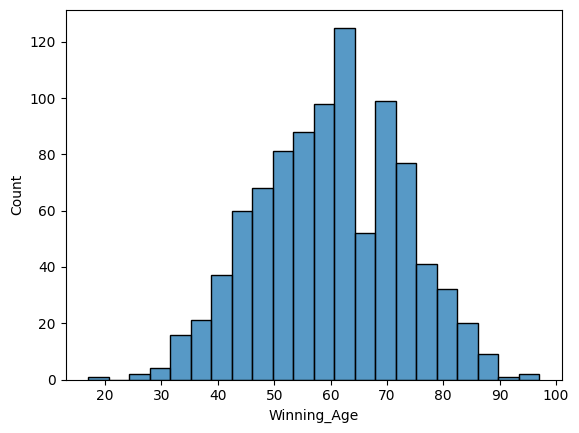

In [334]:
# Creating a histogram to visualise the winning age

sns.histplot(data=df_data, x='Winning_Age')

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [335]:
df_data.describe()

,year,prize_share_pct,Winning_Age
count,962.00,962.00,934.00
mean,"1,971.82",62.68,59.95
std,33.81,29.39,12.62
min,"1,901.00",25.00,17.00
25%,"1,948.00",33.33,51.00
50%,"1,977.00",50.00,60.00
75%,"2,001.00",100.00,69.00
max,"2,020.00",100.00,97.00


### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


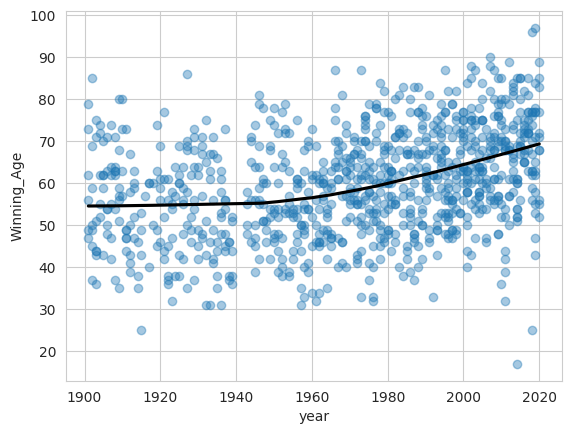

In [339]:
with sns.axes_style('whitegrid'):

  sns.regplot(df_data, x='year',
              y='Winning_Age',
              lowess=True,
              scatter_kws= {'alpha': 0.4},
              line_kws={'color': 'black'}
              )



with### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

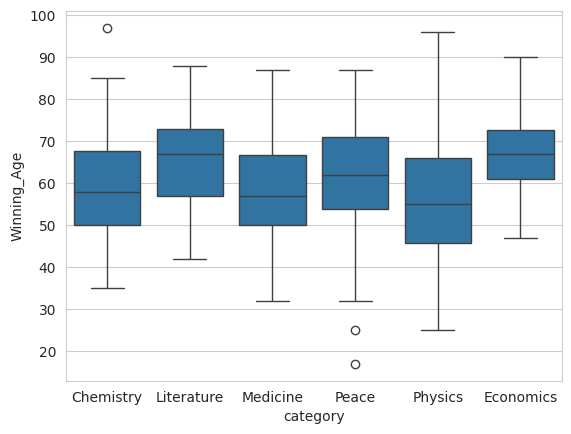

In [343]:
with sns.axes_style('whitegrid'):
  sns.boxplot(df_data, x='category', y='Winning_Age')

plt.show()


**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


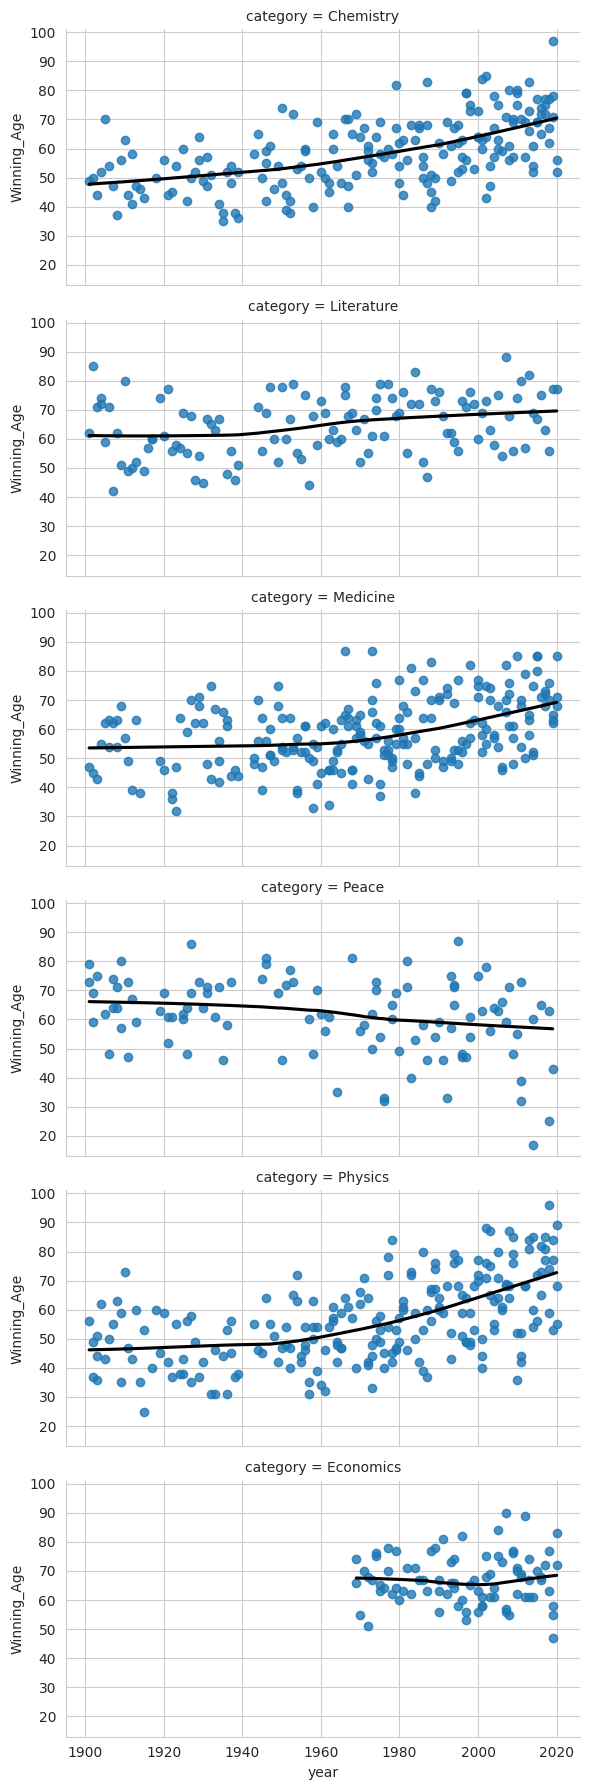

In [351]:
with sns.axes_style('whitegrid'):
  sns.lmplot(df_data, x='year', y='Winning_Age',
             row='category',
             aspect=2,
             line_kws = {'color': 'black'},
             lowess=True, height=3)

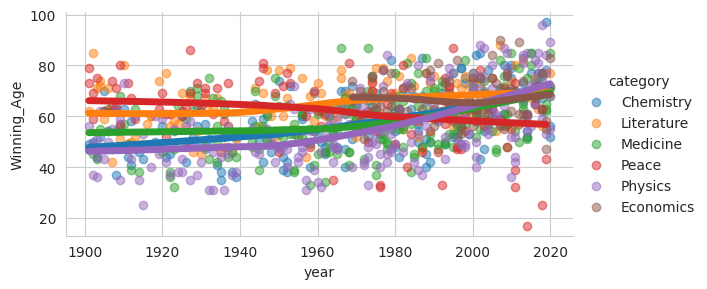

In [356]:
# Combining all six chart in one graph
with sns.axes_style('whitegrid'):
  sns.lmplot(df_data, x='year', y='Winning_Age',
             hue='category',
             aspect=2,
             line_kws = {'linewidth': 5},
             scatter_kws = {'alpha': 0.5},
             lowess=True, height=3)
